In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, precision_recall_curve, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

DATE ADDED TO CATALOG: the date the study was added to the GWAS catalog\
PUBMEDID: the PubMed identifier for the study\
FIRST AUTHOR: the name of the first author of the study\
DATE: the date the study was published\
JOURNAL: the name of the journal the study was published in\
LINK: a link to the study abstract\
STUDY: the name of the GWAS study\
DISEASE/TRAIT: the disease trait being studied\
INITIAL SAMPLE SIZE: the size of the initial study sample\
REPLICATION SAMPLE SIZE: the size of the replication study sample\
REGION: the genomic region being studied\
CHR_ID: the chromosome where the SNP is located\
CHR_POS: the position of the SNP on the chromosome\
REPORTED GENE(S): the gene or genes reported to be associated with the trait\
MAPPED_GENE: the gene closest to the SNP\
UPSTREAM_GENE_ID: the Ensembl ID for the gene upstream of the SNP\
DOWNSTREAM_GENE_ID: the Ensembl ID for the gene downstream of the SNP\
SNP_GENE_IDS: the Ensembl IDs for all genes within 50 kb of the SNP\
UPSTREAM_GENE_DISTANCE: the distance in base pairs from the SNP to the upstream gene\
DOWNSTREAM_GENE_DISTANCE: the distance in base pairs from the SNP to the downstream gene\
STRONGEST SNP-RISK ALLELE: the SNP and risk allele associated with the trait\
SNPS: the rsIDs of all SNPs in the region being studied\
MERGED: indicates whether the SNP has been merged with other SNPs\
SNP_ID_CURRENT: the current rsID of the SNP\
CONTEXT: the genomic context of the SNP\
INTERGENIC: indicates whether the SNP is intergenic\
RISK ALLELE FREQUENCY: the frequency of the risk allele in the study population\
P-VALUE: the p-value for the association between the SNP and the trait\
PVALUE_MLOG: the negative log10-transformed p-value\
P-VALUE (TEXT): a text description of the p-value\
OR or BETA: the odds ratio or beta coefficient for the association between the SNP and the trait\
95% CI (TEXT): the 95% confidence interval for the odds ratio or beta coefficient\
PLATFORM [SNPS PASSING QC]: the genotyping platform used in the study\
CNV: indicates whether the SNP is in a copy number variant region\
MAPPED_TRAIT: the trait mapped to the SNP\
MAPPED_TRAIT_URI: the URI for the mapped trait\
STUDY ACCESSION: the accession number for the study\
GENOTYPING TECHNOLOGY: the genotyping technology used in the study\

In [2]:
data = pd.read_csv("C:\\Users\\Mohi\\Desktop\\Mastera1s2\\Intelligent modelling\\clean_gwas.csv")

In [3]:
data.describe()

,Unnamed: 0,Chromosome,Position,Arm,CHR_ID,CHR_POS,RISK ALLELE FREQUENCY,PVALUE_MLOG,OR or BETA,CIleft,CIright,SNPS_encoded
count,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3.098000e+03,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000
mean,218865.275339,9.496449,20.631398,1.658167,9.496449,7.194426e+07,0.395439,20.692660,0.407840,0.365134,0.422637,81964.425113
std,149033.401516,6.024663,7.158646,0.474401,6.024663,5.131290e+07,0.225094,72.728406,0.963642,0.793653,0.684395,46755.879152
min,79.000000,1.000000,11.100000,1.000000,1.000000,1.200770e+05,0.000000,5.000000,0.001700,0.001100,0.002300,188.000000
25%,107407.250000,5.000000,13.300000,1.000000,5.000000,2.930225e+07,0.251456,7.522879,0.022866,0.017000,0.029000,40057.000000
50%,154409.000000,9.000000,21.320000,2.000000,9.000000,6.169883e+07,0.400000,10.000000,0.056854,0.040000,0.073000,82289.000000
75%,339799.750000,14.000000,24.300000,2.000000,14.000000,1.081807e+08,0.490525,15.654947,0.960000,0.940000,0.980000,123025.250000
max,516942.000000,22.000000,42.300000,2.000000,22.000000,2.411160e+08,0.999000,2578.522879,27.798700,24.350000,8.710000,163112.000000


In [4]:
data.corr()

,Unnamed: 0,Chromosome,Position,Arm,CHR_ID,CHR_POS,RISK ALLELE FREQUENCY,PVALUE_MLOG,OR or BETA,CIleft,CIright,SNPS_encoded
Unnamed: 0,1.000000,-0.010498,0.039630,-0.044791,-0.010498,-0.007325,-0.022419,0.057020,-0.242789,-0.279013,-0.365257,0.058872
Chromosome,-0.010498,1.000000,-0.439516,0.263314,1.000000,-0.388739,-0.047152,0.009950,0.013948,0.014691,0.027403,0.057671
Position,0.039630,-0.439516,1.000000,0.141192,-0.439516,0.544032,0.072299,-0.001171,-0.029260,-0.028736,-0.028224,-0.002647
Arm,-0.044791,0.263314,0.141192,1.000000,0.263314,0.593871,0.013903,0.002227,0.024267,0.035165,0.037390,0.039102
CHR_ID,-0.010498,1.000000,-0.439516,0.263314,1.000000,-0.388739,-0.047152,0.009950,0.013948,0.014691,0.027403,0.057671
CHR_POS,-0.007325,-0.388739,0.544032,0.593871,-0.388739,1.000000,0.062706,0.018240,0.000488,0.006739,0.011831,-0.017356
RISK ALLELE FREQUENCY,-0.022419,-0.047152,0.072299,0.013903,-0.047152,0.062706,1.000000,0.010850,0.015264,0.030211,0.030161,0.019359
PVALUE_MLOG,0.057020,0.009950,-0.001171,0.002227,0.009950,0.018240,0.010850,1.000000,0.003739,0.009274,-0.003406,0.037586
OR or BETA,-0.242789,0.013948,-0.029260,0.024267,0.013948,0.000488,0.015264,0.003739,1.000000,0.988313,0.758687,-0.024950
CIleft,-0.279013,0.014691,-0.028736,0.035165,0.014691,0.006739,0.030211,0.009274,0.988313,1.000000,0.760058,-0.034346


In [5]:
# import seaborn as sns
# # Pair plot
# # Create PairGrid object
# pair_grid = sns.PairGrid(data)

# # Plot pairwise relationships
# pair_grid = pair_grid.map(sns.scatterplot)

In [6]:
# the target will be 1 for breast cancer and 0 for anything else
y = data['DISEASE/TRAIT'].apply(lambda x: 1 if x == 'Breast cancer' else 0)

print(y.value_counts())
print(data.head())

0    1853
1    1245
Name: DISEASE/TRAIT, dtype: int64
   Unnamed: 0 DISEASE/TRAIT  Chromosome  Position  Arm  CHR_ID   CHR_POS  \
0        6586        Height           4     15.31    1     4.0  18016107   
1      498908        Height           1     36.11    1     1.0  24717289   
2      491687        Height          20     13.12    2    20.0  45804240   
3      447483        Height           5     14.30    2     5.0  87361147   
4      142549        Height           7     22.20    1     7.0   2871864   

         SNPS  RISK ALLELE FREQUENCY  PVALUE_MLOG  OR or BETA  CIleft  \
0   rs6830062                 0.2300     8.301030      0.1000  0.0700   
1   rs3122037                 0.3554    11.154902      0.0044  0.0032   
2   rs6514062                 0.0922    13.045757      0.0312  0.0230   
3   rs4421140                 0.2320    31.154902      0.0087  0.0073   
4  rs56343587                 0.7168     7.000000      0.0377  0.0240   

   CIright  SNPS_encoded  
0   0.1300        12456

In [7]:
# select data for ML
feature_names = ['Chromosome', 'Position', 'Arm', 'CHR_ID', 'CHR_POS', 'SNPS_encoded', 'RISK ALLELE FREQUENCY',
       'PVALUE_MLOG', 'OR or BETA', 'CIleft', 'CIright']
X = data[feature_names]

In [8]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train a logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the model's performance using a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_mat)
tp = conf_mat[1, 1]
tn = conf_mat[0, 0]
fp = conf_mat[0, 1]
fn = conf_mat[1, 0]

accuracy_positive = tp / (tp + fn)
print(accuracy_positive)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

logloss = log_loss(y_test, y_pred, eps=1e-15)

LR_res = [accuracy, accuracy_positive, f1, precision, recall]
print(LR_res)

Accuracy: 0.6274193548387097
Confusion matrix:
[[389   0]
 [231   0]]
0.0
[0.6274193548387097, 0.0, 0.0, 0.0, 0.0]


C:\Users\Mohi\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.linear_model import SGDClassifier

# fit random SGD classifier to training data
classifier = SGDClassifier()
classifier.fit(X_train, y_train)

# evaluate performance on test set
y_pred = classifier.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy}")
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_mat)
tp = conf_mat[1, 1]
tn = conf_mat[0, 0]
fp = conf_mat[0, 1]
fn = conf_mat[1, 0]

accuracy_positive = tp / (tp + fn)
print(accuracy_positive)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

logloss = log_loss(y_test, y_pred, eps=1e-15)

SGD_res = [accuracy, accuracy_positive, f1, precision, recall]

Accuracy: 0.3741935483870968
Confusion matrix:
[[  3 386]
 [  2 229]]
0.9913419913419913


In [11]:
from sklearn.neighbors import KNeighborsClassifier

# fit random KNN classifier to training data
classifier = KNeighborsClassifier(2)
classifier.fit(X_train, y_train)

# evaluate performance on test set
y_pred = classifier.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy}")
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_mat)
tp = conf_mat[1, 1]
tn = conf_mat[0, 0]
fp = conf_mat[0, 1]
fn = conf_mat[1, 0]

accuracy_positive = tp / (tp + fn)
print(accuracy_positive)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

logloss = log_loss(y_test, y_pred, eps=1e-15)

KNN_res = [accuracy, accuracy_positive, f1, precision, recall]

Accuracy: 0.7483870967741936
Confusion matrix:
[[334  55]
 [101 130]]
0.5627705627705628


In [12]:
from sklearn.tree import DecisionTreeClassifier

# fit random KNN classifier to training data
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# evaluate performance on test set
y_pred = classifier.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy}")
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_mat)
tp = conf_mat[1, 1]
tn = conf_mat[0, 0]
fp = conf_mat[0, 1]
fn = conf_mat[1, 0]

accuracy_positive = tp / (tp + fn)
print(accuracy_positive)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

logloss = log_loss(y_test, y_pred, eps=1e-15)

DT_res = [accuracy, accuracy_positive, f1, precision, recall]

print(DT_res)

Accuracy: 0.8612903225806452
Confusion matrix:
[[346  43]
 [ 43 188]]
0.8138528138528138
[0.8612903225806452, 0.8138528138528138, 0.8138528138528138, 0.8138528138528138, 0.8138528138528138]


In [13]:
# fit random forest classifier to training data
classifier = RandomForestClassifier(n_estimators=250, random_state=42)
classifier.fit(X_train, y_train)

# evaluate performance on test set
y_pred = classifier.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy}")
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_mat)
tp = conf_mat[1, 1]
tn = conf_mat[0, 0]
fp = conf_mat[0, 1]
fn = conf_mat[1, 0]

accuracy_positive = tp / (tp + fn)
print(accuracy_positive)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

logloss = log_loss(y_test, y_pred, eps=1e-15)

RF_res = [accuracy, accuracy_positive, f1, precision, recall]
print(RF_res)

Accuracy: 0.9096774193548387
Confusion matrix:
[[354  35]
 [ 21 210]]
0.9090909090909091
[0.9096774193548387, 0.9090909090909091, 0.8823529411764706, 0.8571428571428571, 0.9090909090909091]


In [14]:
# Get indices of misclassified examples
misclassified_indices = np.where(y_pred != y_test)[0]

# Extract misclassified examples from test set
misclassified_examples = X_test.iloc[misclassified_indices]

print(misclassified_examples)

      Chromosome  Position  Arm  CHR_ID    CHR_POS  SNPS_encoded  \
1606          16     23.30    2    16.0   83432308        139557   
346            9     21.31    2     9.0   79290675         57444   
2461           9     21.30    1     9.0   22067594          7192   
2360          21     22.12    2    21.0   34746798         31316   
1814           6     21.32    1     6.0   32373094         18310   
1330           1     36.33    1     1.0    1309988         19717   
2350           3     25.10    2     3.0  150720263        112392   
1226           9     22.33    2     9.0   99153605         94221   
2960           8     23.30    1     8.0     220692        121914   
2340           2     33.10    2     2.0  201288355          3211   
2752           1     13.20    1     1.0  113630788         29719   
1737          18     21.33    2    18.0   62339745        152971   
0              4     15.31    1     4.0   18016107        124563   
1161          14     24.20    2    14.0   706255

ROC Curve:

The ROC curve represents the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various classification thresholds.
It shows the trade-off between correctly classifying positive instances and incorrectly classifying negative instances as the classification threshold changes.
The closer the ROC curve is to the top-left corner, the better the model's performance, with higher true positive rates and lower false positive rates.
The area under the ROC curve (AUC-ROC) summarizes the overall performance of the model, where an AUC-ROC of 1 represents a perfect classifier, and 0.5 indicates random guessing.

C:\Users\Mohi\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


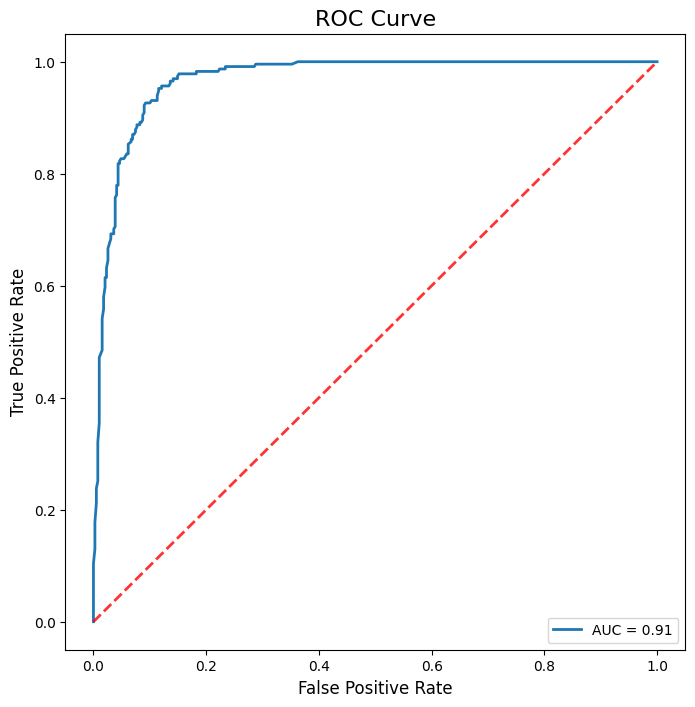

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate ROC curve
scores = classifier.predict_proba(np.array(X_test))[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, scores)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(fpr, tpr, lw=2, label='AUC = {:.2f}'.format(auc_score))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
ax.set_xlabel('False Positive Rate', fontsize=12, color='black')
ax.set_ylabel('True Positive Rate', fontsize=12, color='black')
ax.set_title('ROC Curve', fontsize=16, color='black')
ax.legend(loc='lower right')
plt.show()


Precision-Recall Curve:

The precision-recall curve displays the trade-off between precision and recall at various classification thresholds.
Precision measures the proportion of true positive predictions among all positive predictions, while recall (sensitivity) measures the proportion of true positives correctly identified.
A high-precision model makes few false positive errors, while a high-recall model captures a large proportion of true positives.
Similar to the ROC curve, the closer the precision-recall curve is to the top-right corner, the better the model's performance.
The area under the precision-recall curve (AUC-PR) summarizes the overall performance, with values closer to 1 indicating better model performance.

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Generate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calculate average precision score
avg_precision = average_precision_score(y_test, y_pred)

# Plot precision-recall curve
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(recall, precision, lw=2, label='Avg Precision = {:.2f}'.format(avg_precision))
ax.set_xlabel('Recall', fontsize=12, color='black')
ax.set_ylabel('Precision', fontsize=12, color='black')
ax.set_title('Precision-Recall Curve', fontsize=16, color='black')
ax.legend(loc='lower left')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest classifier
feature_importances = classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the feature importances as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_importances, align='center')
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [ ]:
# Separate the correctly predicted instances
correct_predictions = X.drop(misclassified_indices)

# Separate the incorrectly predicted instances
incorrect_predictions = misclassified_examples

# Calculate descriptive statistics for each feature
correct_stats = correct_predictions.describe()
incorrect_stats = incorrect_predictions.describe()

# View the statistics
print("Correct Predictions Statistics:")
print(correct_stats)

print("\nIncorrect Predictions Statistics:")
print(incorrect_stats)

In [ ]:
import plotly.graph_objects as go

categories = ['accuracy','accuracy positive','f1','precision', 'recall']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=LR_res,
      theta=categories,
      fill='toself',
      name='Logistic regression'
))
fig.add_trace(go.Scatterpolar(
      r=SGD_res,
      theta=categories,
      fill='toself',
      name='SGD'
))
fig.add_trace(go.Scatterpolar(
      r=DT_res,
      theta=categories,
      fill='toself',
      name='Decision tree'
))
fig.add_trace(go.Scatterpolar(
      r=KNN_res,
      theta=categories,
      fill='toself',
      name='KNN'
))
fig.add_trace(go.Scatterpolar(
      r=RF_res,
      theta=categories,
      fill='toself',
      name='Random forest'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()